## Examine Model

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from evaluate import evaluate_lfw
from facenet_pytorch import InceptionResnetV1
from config import *

f:\anacoda3\envs\cl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
casia_cropped_path = os.path.join(DATA_PATH, 'CASIA-WebFace-cropped/')
num_classes = len(os.listdir(casia_cropped_path))
resnet = InceptionResnetV1(classify=True, num_classes=num_classes, dropout_prob=0.2)

In [3]:
lfw_accuracy = dict()
lfw_val = dict()
lfw_far = dict()

# Load state dict for model
for name in ['baseline', 'baseline+smooth', 'baseline+smooth+triplet_center', 'baseline+triplet_center']:
    state_dict = torch.load(f'trained_models/{name}.pth')
    resnet.load_state_dict(state_dict)
    lfw_accuracy[name], lfw_val[name], lfw_far[name] = evaluate_lfw(resnet)

Running on device: cuda:0
Mean Accuracy: 0.9681666666666666
VAL: 0.755
FAR: 0.0013333333333333335
Running on device: cuda:0
Mean Accuracy: 0.9731666666666667
VAL: 0.826
FAR: 0.0013333333333333335
Running on device: cuda:0
Mean Accuracy: 0.9734999999999999
VAL: 0.853
FAR: 0.0013333333333333335
Running on device: cuda:0
Mean Accuracy: 0.9748333333333333
VAL: 0.777
FAR: 0.001


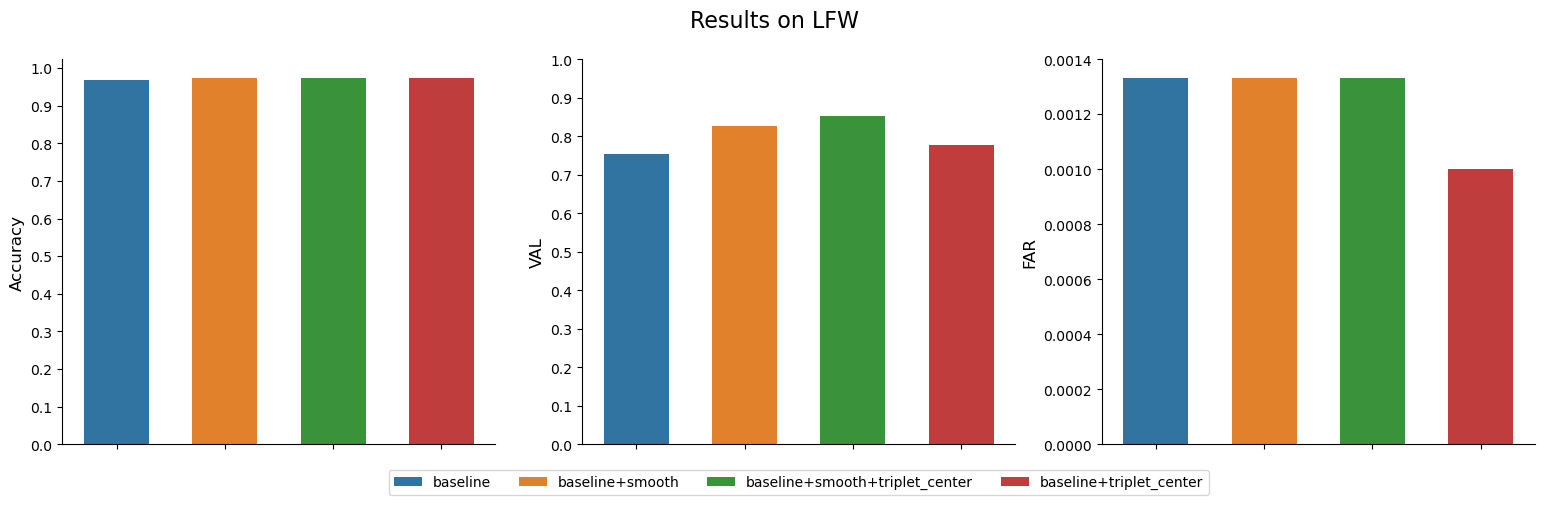

In [55]:
# Plot the bar chart for each metric
fig, axs = plt.subplots(1, 3, figsize=(19, 5))

for i, metric in enumerate([lfw_accuracy, lfw_val, lfw_far]):
    sns.barplot(x=list(metric.keys()), y=list(metric.values()), ax=axs[i], width=0.6)
    axs[i].set_xticklabels([])
    if i < 2:
        axs[i].set_yticks(np.arange(0.0, 1.1, 0.1))

    # Remove spines
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)

axs[0].set_ylabel('Accuracy', fontsize=12)
axs[1].set_ylabel('VAL', fontsize=12)
axs[2].set_ylabel('FAR', fontsize=12)

# Set legend with colors for each model
axs[1].legend([plt.Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()) for pc in axs[1].patches],
                list(metric.keys()), loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.15))

axs[1].set_ylim(0.0, 1.0)
plt.suptitle('Results on LFW', fontsize=16)
fig.savefig('results/1task.png', bbox_inches='tight')
plt.show()